In this part, we are going to implement a two-layer fully connected autoencoder on MNIST handwritten digits dataset without any deep learning libraries, using numpy only.

Important notes:

- Variables are named in this notebook regarding following conventions:

     - Constants are named with uppercase words separated with underscores. eg. `INPUT_SIZE`, `LEARNING_RATE`.

     - Derivative of variables are named as variable name with `D_` prefix. For example, `D_x` indicates $\frac{\partial x}{\partial loss}$

     - Output of a layer n before activation function is denoted as `hn`. For example, output of first layer before activation is denoted as `h1`. 

     - Similarly, output of a layer n after activation function is denoted as `on`. For example, output of first layer after activation is denoted as `o1`. 



- I try to use 'vectorized' code, that is, avoid for loops as much as possible and use vector and matrix operations instead.

- Recommended watch before starting the noteboo, https://www.youtube.com/watch?v=lFOOjeH2wsY

# 1) Boilerplate, imports, data loading

In [1]:
from test_utils import load_dataset, test_relu, test_sigmoid, test_mean_squared_error, test_sigmoid_backward, test_weights
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# load_dataset function; 
# - takes training set of MNIST dataset from torch datasets,
# - flattens 28x28 images to 784 dimensional vectors


X = load_dataset()

# convert from integers to floats
X = X.astype('float32')
# normalize to the range 0-1
X /= 255.0

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting ./MNIST/raw/train-images-idx3-ubyte.gz to ./MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting ./MNIST/raw/train-labels-idx1-ubyte.gz to ./MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting ./MNIST/raw/t10k-images-idx3-ubyte.gz to ./MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting ./MNIST/raw/t10k-labels-idx1-ubyte.gz to ./MNIST/raw



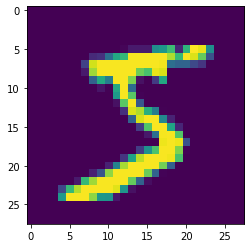

In [2]:
#visualize 1 sample
plt.imshow(X[0].reshape(28,28))
plt.show()

# 2) Initialize Weights



Randomly initialize layer 1 and layer 2 weights as 2D numpy arrays with zero mean and 0.01 standard deviation. For simplicity, biases are omitted.

In [3]:
INPUT_SIZE  = X.shape[1]
HIDDEN_SIZE = 64

w1 = np.random.normal(loc=0.0, scale=0.01, size=(INPUT_SIZE,HIDDEN_SIZE))
w2 = np.random.normal(loc=0.0, scale=0.01, size=(HIDDEN_SIZE,INPUT_SIZE))


# 3) Define activation functions 

In this part, we will define the necessary function in numpy. Note that all functions need to operate on batches, not single instances. As a convention, first dimension of all tensors will be the batch dimension. 

Define relu and sigmoid activation functions in forward mode.

In [4]:
def relu(x):
    return np.maximum(x,0,x)
# this form is faster. see https://stackoverflow.com/questions/32109319/how-to-implement-the-relu-function-in-numpy

In [5]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

# 4.a) Define activation functions in 'backward mode'
Suppose you know the derivative of a function's output with respect to the loss, which is $\frac{\partial loss}{\partial f(x)}$. Backward mode of a function takes $\frac{\partial loss}{\partial f(x)}$ (```D_output``` argument) and gives derivatives of its input with respect to the loss $\frac{\partial loss}{\partial x}$. 

Backward mode of relu is defined below. Using this as an example, sigmoid activation function in backward mode. You are going to use these functions to implement backpropagation. 



In [6]:
#Note: If you are confused about D_output means, read the notes at the top of the page.
def relu_backward(D_output, output):
    '''
    relu_backward: Backward mode of relu activation function
    
    Arguments;
    D_output: Derivative of output of relu with respect to loss.
    output  : Output of relu activation function
    
    Returns;
    Derivative of input of relu function with respect to loss.
    '''
    output[output<=0] = 0
    output[output>0] = 1
    return output*D_output


In [7]:
def sigmoid_backward(D_output, output):    
    '''
    sigmoid_backward: Backward mode of sigmoid activation function
    
    Arguments;
    D_output: Derivative of output of sigmoid with respect to loss.
    output  : Output of sigmoid activation function
    
    Returns;
    Derivative of input of sigmoid function with respect to loss.
    '''
    return D_output*output * (1.0-output)

# 4.b) Define loss function


Define the function computing mean squared error metric, given outputs and targets.

In [8]:
def mean_squared_error(outputs, targets):
    squared_errors = (np.square(outputs - targets)).mean(axis=1)
    return np.mean(squared_errors)

# 5) Sanity Check
Since Part 6 will be a little more difficult than the other parts, make sure everything is correct so far using test scripts before proceeding Part 6,(just run the cell below). If anything is incorrect with your implementations, do not start implementing part 6 before fixing the mistakes and making sure everything works as intended.

Note: Don't forget to run cells after making changes in them or you may re-test your old implementations unintentionally.

In [9]:
test_weights(w1, w2, INPUT_SIZE, HIDDEN_SIZE)
test_relu(relu)
test_sigmoid(sigmoid)
test_sigmoid_backward(sigmoid_backward)
test_mean_squared_error(mean_squared_error)

Weights are initialized properly.
'relu' is implemented properly.
'sigmoid' is implemented properly.
'sigmoid_backward' is implemented properly.
'mean_squared_error' is implemented properly.


# 6) Training

Set hyperparameters

In [10]:
BATCH_SIZE = 1024
NUM_EPOCHS = 10
LEARNING_RATE = 0.0001

Calculate how many iterations will be done per epoch.

Hint: You may want to use `//` operator, which does integer division in Python 3.

In [11]:
NUM_TRAINING_INSTANCES = X.shape[0]

In [12]:
ITERATIONS_PER_EPOCH = NUM_TRAINING_INSTANCES//BATCH_SIZE

Training loop mainly consists of 4 steps

1) Sample batch from dataset

2) Forward propagation

3) Backpropagation

4) Parameter updates

1st and 4th steps are implemented. You are expected to implement forward propagation and backpropagation using the functions you defined above. 

- You can use ```@``` operator or ```np.dot``` function for matrix multiplication.
- Note that you have implemented every backward operation needed, except matrix multiplication. Find out what is the backward mode of matrix multiplication operation. Or derive it, if you feel adventurous.

Epoch 1, Iteration 0 -- Loss: 0.231329


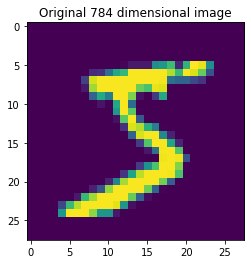

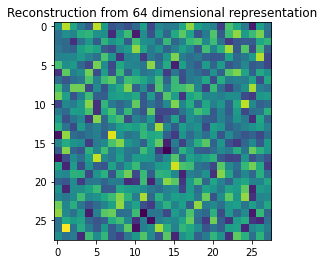

Epoch 1, Iteration 1 -- Loss: 0.230095
Epoch 1, Iteration 2 -- Loss: 0.203418
Epoch 1, Iteration 3 -- Loss: 0.072965
Epoch 1, Iteration 4 -- Loss: 0.079374
Epoch 1, Iteration 5 -- Loss: 0.096344
Epoch 1, Iteration 6 -- Loss: 0.092195
Epoch 1, Iteration 7 -- Loss: 0.087365
Epoch 1, Iteration 8 -- Loss: 0.088758
Epoch 1, Iteration 9 -- Loss: 0.084303
Epoch 1, Iteration 10 -- Loss: 0.082686


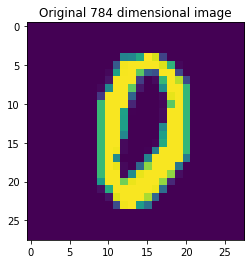

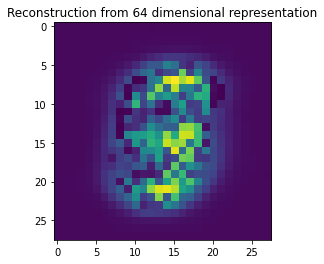

Epoch 1, Iteration 11 -- Loss: 0.076224
Epoch 1, Iteration 12 -- Loss: 0.080641
Epoch 1, Iteration 13 -- Loss: 0.080337
Epoch 1, Iteration 14 -- Loss: 0.072739
Epoch 1, Iteration 15 -- Loss: 0.071557
Epoch 1, Iteration 16 -- Loss: 0.071643
Epoch 1, Iteration 17 -- Loss: 0.068302
Epoch 1, Iteration 18 -- Loss: 0.071112
Epoch 1, Iteration 19 -- Loss: 0.074684
Epoch 1, Iteration 20 -- Loss: 0.072745


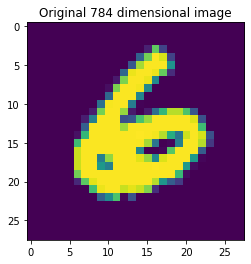

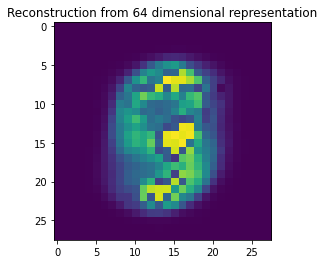

Epoch 1, Iteration 21 -- Loss: 0.071710
Epoch 1, Iteration 22 -- Loss: 0.071003
Epoch 1, Iteration 23 -- Loss: 0.067922
Epoch 1, Iteration 24 -- Loss: 0.066407
Epoch 1, Iteration 25 -- Loss: 0.064965
Epoch 1, Iteration 26 -- Loss: 0.065430
Epoch 1, Iteration 27 -- Loss: 0.063951
Epoch 1, Iteration 28 -- Loss: 0.062033
Epoch 1, Iteration 29 -- Loss: 0.059475
Epoch 1, Iteration 30 -- Loss: 0.056914


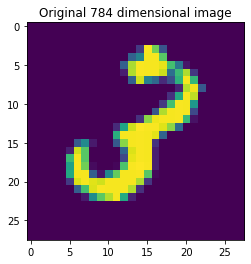

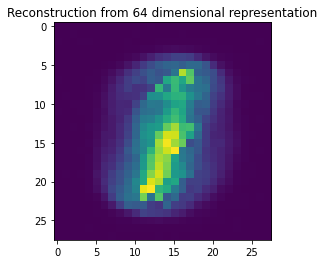

Epoch 1, Iteration 31 -- Loss: 0.059205
Epoch 1, Iteration 32 -- Loss: 0.059327
Epoch 1, Iteration 33 -- Loss: 0.060330
Epoch 1, Iteration 34 -- Loss: 0.060698
Epoch 1, Iteration 35 -- Loss: 0.062968
Epoch 1, Iteration 36 -- Loss: 0.061349
Epoch 1, Iteration 37 -- Loss: 0.058986
Epoch 1, Iteration 38 -- Loss: 0.056656
Epoch 1, Iteration 39 -- Loss: 0.054079
Epoch 1, Iteration 40 -- Loss: 0.053754


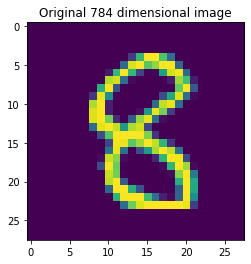

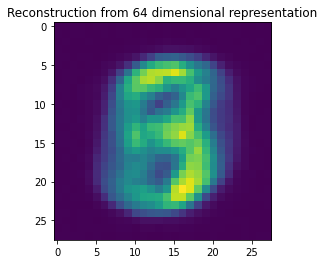

Epoch 1, Iteration 41 -- Loss: 0.053297
Epoch 1, Iteration 42 -- Loss: 0.051051
Epoch 1, Iteration 43 -- Loss: 0.052789
Epoch 1, Iteration 44 -- Loss: 0.052191
Epoch 1, Iteration 45 -- Loss: 0.051202
Epoch 1, Iteration 46 -- Loss: 0.051183
Epoch 1, Iteration 47 -- Loss: 0.051829
Epoch 1, Iteration 48 -- Loss: 0.053251
Epoch 1, Iteration 49 -- Loss: 0.050298
Epoch 1, Iteration 50 -- Loss: 0.050640


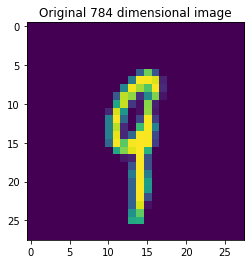

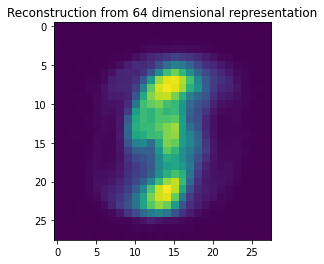

Epoch 1, Iteration 51 -- Loss: 0.046285
Epoch 1, Iteration 52 -- Loss: 0.047094
Epoch 1, Iteration 53 -- Loss: 0.046452
Epoch 1, Iteration 54 -- Loss: 0.045410
Epoch 1, Iteration 55 -- Loss: 0.045558
Epoch 1, Iteration 56 -- Loss: 0.044758
Epoch 1, Iteration 57 -- Loss: 0.043305
Epoch 2, Iteration 58 -- Loss: 0.043433


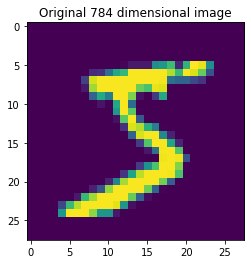

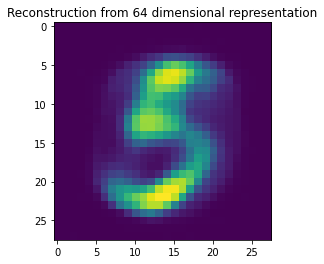

Epoch 2, Iteration 59 -- Loss: 0.045743
Epoch 2, Iteration 60 -- Loss: 0.045129
Epoch 2, Iteration 61 -- Loss: 0.042939
Epoch 2, Iteration 62 -- Loss: 0.044432
Epoch 2, Iteration 63 -- Loss: 0.043255
Epoch 2, Iteration 64 -- Loss: 0.042697
Epoch 2, Iteration 65 -- Loss: 0.043239
Epoch 2, Iteration 66 -- Loss: 0.043070
Epoch 2, Iteration 67 -- Loss: 0.044211
Epoch 2, Iteration 68 -- Loss: 0.043620


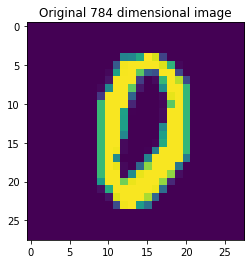

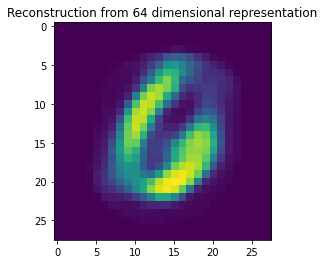

Epoch 2, Iteration 69 -- Loss: 0.042826
Epoch 2, Iteration 70 -- Loss: 0.047055
Epoch 2, Iteration 71 -- Loss: 0.044866
Epoch 2, Iteration 72 -- Loss: 0.041896
Epoch 2, Iteration 73 -- Loss: 0.039695
Epoch 2, Iteration 74 -- Loss: 0.039408
Epoch 2, Iteration 75 -- Loss: 0.038137
Epoch 2, Iteration 76 -- Loss: 0.039663
Epoch 2, Iteration 77 -- Loss: 0.040702
Epoch 2, Iteration 78 -- Loss: 0.039484


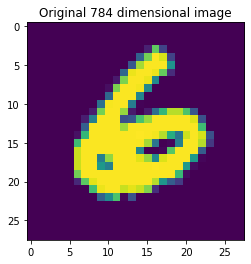

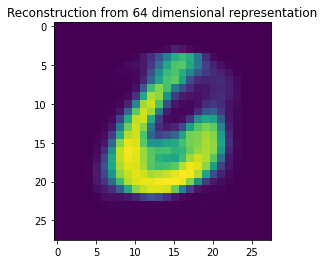

Epoch 2, Iteration 79 -- Loss: 0.040869
Epoch 2, Iteration 80 -- Loss: 0.040933
Epoch 2, Iteration 81 -- Loss: 0.040752
Epoch 2, Iteration 82 -- Loss: 0.039342
Epoch 2, Iteration 83 -- Loss: 0.038598
Epoch 2, Iteration 84 -- Loss: 0.039591
Epoch 2, Iteration 85 -- Loss: 0.038630
Epoch 2, Iteration 86 -- Loss: 0.039084
Epoch 2, Iteration 87 -- Loss: 0.037942
Epoch 2, Iteration 88 -- Loss: 0.036951


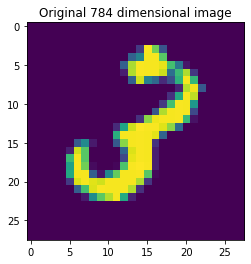

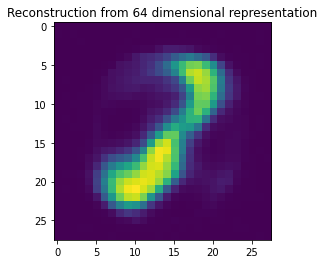

Epoch 2, Iteration 89 -- Loss: 0.037844
Epoch 2, Iteration 90 -- Loss: 0.036734
Epoch 2, Iteration 91 -- Loss: 0.036603
Epoch 2, Iteration 92 -- Loss: 0.037752
Epoch 2, Iteration 93 -- Loss: 0.042333
Epoch 2, Iteration 94 -- Loss: 0.039558
Epoch 2, Iteration 95 -- Loss: 0.037209
Epoch 2, Iteration 96 -- Loss: 0.037029
Epoch 2, Iteration 97 -- Loss: 0.036292
Epoch 2, Iteration 98 -- Loss: 0.037188


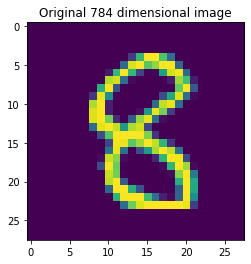

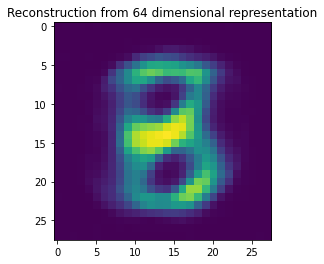

Epoch 2, Iteration 99 -- Loss: 0.035590
Epoch 2, Iteration 100 -- Loss: 0.033172
Epoch 2, Iteration 101 -- Loss: 0.034858
Epoch 2, Iteration 102 -- Loss: 0.035522
Epoch 2, Iteration 103 -- Loss: 0.034730
Epoch 2, Iteration 104 -- Loss: 0.035145
Epoch 2, Iteration 105 -- Loss: 0.035633
Epoch 2, Iteration 106 -- Loss: 0.035759
Epoch 2, Iteration 107 -- Loss: 0.033905
Epoch 2, Iteration 108 -- Loss: 0.034881


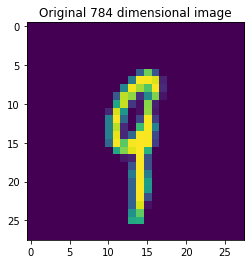

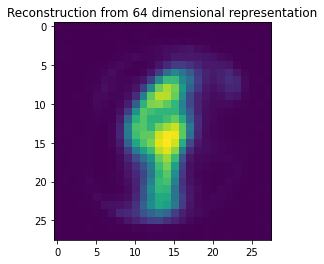

Epoch 2, Iteration 109 -- Loss: 0.032387
Epoch 2, Iteration 110 -- Loss: 0.033769
Epoch 2, Iteration 111 -- Loss: 0.033414
Epoch 2, Iteration 112 -- Loss: 0.033509
Epoch 2, Iteration 113 -- Loss: 0.033412
Epoch 2, Iteration 114 -- Loss: 0.032461
Epoch 2, Iteration 115 -- Loss: 0.031647
Epoch 3, Iteration 116 -- Loss: 0.031059


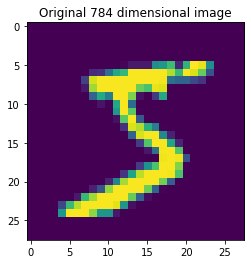

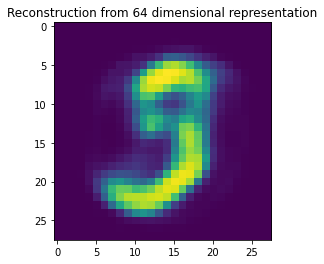

Epoch 3, Iteration 117 -- Loss: 0.034108
Epoch 3, Iteration 118 -- Loss: 0.033941
Epoch 3, Iteration 119 -- Loss: 0.033049
Epoch 3, Iteration 120 -- Loss: 0.033470
Epoch 3, Iteration 121 -- Loss: 0.033723
Epoch 3, Iteration 122 -- Loss: 0.034034
Epoch 3, Iteration 123 -- Loss: 0.033656
Epoch 3, Iteration 124 -- Loss: 0.032411
Epoch 3, Iteration 125 -- Loss: 0.032648
Epoch 3, Iteration 126 -- Loss: 0.031233


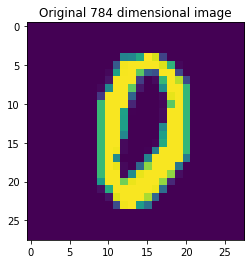

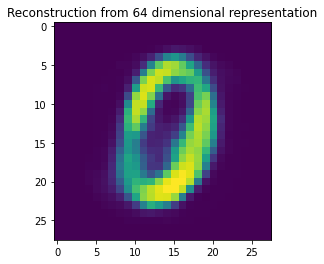

Epoch 3, Iteration 127 -- Loss: 0.029624
Epoch 3, Iteration 128 -- Loss: 0.033770
Epoch 3, Iteration 129 -- Loss: 0.033965
Epoch 3, Iteration 130 -- Loss: 0.033418
Epoch 3, Iteration 131 -- Loss: 0.031314
Epoch 3, Iteration 132 -- Loss: 0.031335
Epoch 3, Iteration 133 -- Loss: 0.030389
Epoch 3, Iteration 134 -- Loss: 0.031466
Epoch 3, Iteration 135 -- Loss: 0.031798
Epoch 3, Iteration 136 -- Loss: 0.031648


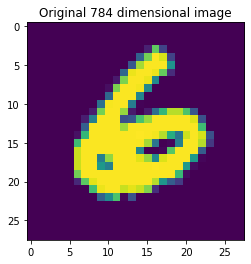

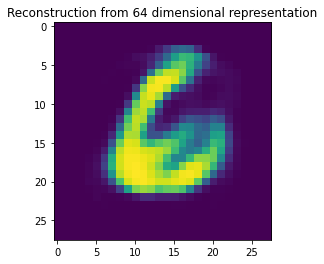

Epoch 3, Iteration 137 -- Loss: 0.032207
Epoch 3, Iteration 138 -- Loss: 0.031503
Epoch 3, Iteration 139 -- Loss: 0.031959
Epoch 3, Iteration 140 -- Loss: 0.030763
Epoch 3, Iteration 141 -- Loss: 0.029901
Epoch 3, Iteration 142 -- Loss: 0.030465
Epoch 3, Iteration 143 -- Loss: 0.029459
Epoch 3, Iteration 144 -- Loss: 0.030212
Epoch 3, Iteration 145 -- Loss: 0.029782
Epoch 3, Iteration 146 -- Loss: 0.029406


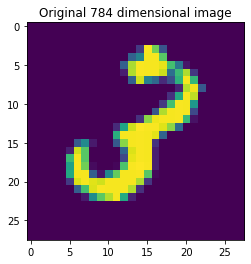

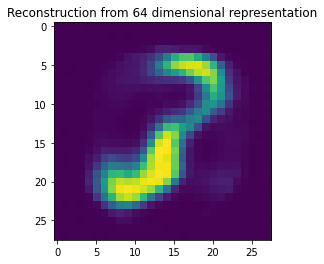

Epoch 3, Iteration 147 -- Loss: 0.029893
Epoch 3, Iteration 148 -- Loss: 0.028617
Epoch 3, Iteration 149 -- Loss: 0.028261
Epoch 3, Iteration 150 -- Loss: 0.029044
Epoch 3, Iteration 151 -- Loss: 0.033216
Epoch 3, Iteration 152 -- Loss: 0.031175
Epoch 3, Iteration 153 -- Loss: 0.029062
Epoch 3, Iteration 154 -- Loss: 0.029307
Epoch 3, Iteration 155 -- Loss: 0.028768
Epoch 3, Iteration 156 -- Loss: 0.030115


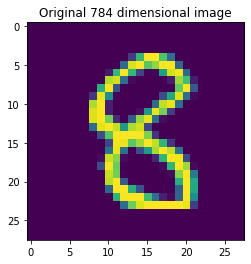

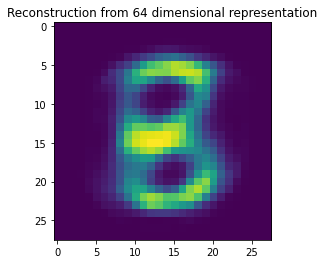

Epoch 3, Iteration 157 -- Loss: 0.028859
Epoch 3, Iteration 158 -- Loss: 0.027591
Epoch 3, Iteration 159 -- Loss: 0.028771
Epoch 3, Iteration 160 -- Loss: 0.029043
Epoch 3, Iteration 161 -- Loss: 0.028109
Epoch 3, Iteration 162 -- Loss: 0.028451
Epoch 3, Iteration 163 -- Loss: 0.028680
Epoch 3, Iteration 164 -- Loss: 0.028906
Epoch 3, Iteration 165 -- Loss: 0.027167
Epoch 3, Iteration 166 -- Loss: 0.028265


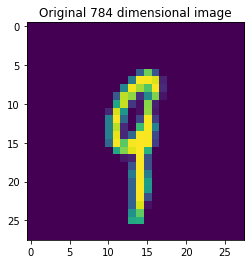

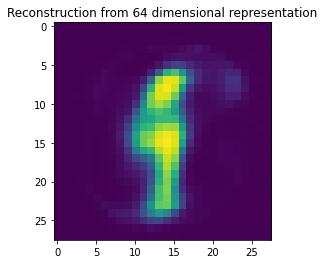

Epoch 3, Iteration 167 -- Loss: 0.026095
Epoch 3, Iteration 168 -- Loss: 0.027592
Epoch 3, Iteration 169 -- Loss: 0.026715
Epoch 3, Iteration 170 -- Loss: 0.026924
Epoch 3, Iteration 171 -- Loss: 0.027035
Epoch 3, Iteration 172 -- Loss: 0.026689
Epoch 3, Iteration 173 -- Loss: 0.025888
Epoch 4, Iteration 174 -- Loss: 0.025632


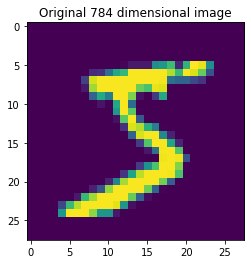

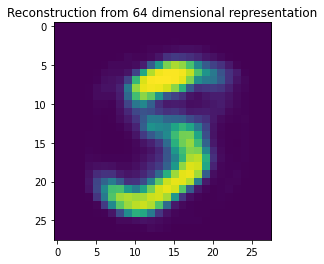

Epoch 4, Iteration 175 -- Loss: 0.028540
Epoch 4, Iteration 176 -- Loss: 0.027243
Epoch 4, Iteration 177 -- Loss: 0.026601
Epoch 4, Iteration 178 -- Loss: 0.027116
Epoch 4, Iteration 179 -- Loss: 0.027155
Epoch 4, Iteration 180 -- Loss: 0.027458
Epoch 4, Iteration 181 -- Loss: 0.027916
Epoch 4, Iteration 182 -- Loss: 0.027124
Epoch 4, Iteration 183 -- Loss: 0.027741
Epoch 4, Iteration 184 -- Loss: 0.026529


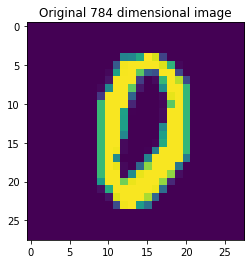

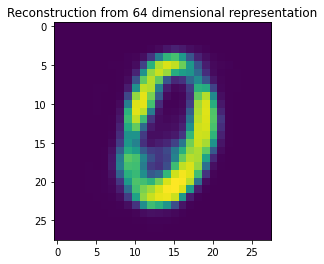

Epoch 4, Iteration 185 -- Loss: 0.025963
Epoch 4, Iteration 186 -- Loss: 0.029404
Epoch 4, Iteration 187 -- Loss: 0.029729
Epoch 4, Iteration 188 -- Loss: 0.028157
Epoch 4, Iteration 189 -- Loss: 0.025892
Epoch 4, Iteration 190 -- Loss: 0.025797
Epoch 4, Iteration 191 -- Loss: 0.024951
Epoch 4, Iteration 192 -- Loss: 0.025753
Epoch 4, Iteration 193 -- Loss: 0.025641
Epoch 4, Iteration 194 -- Loss: 0.025175


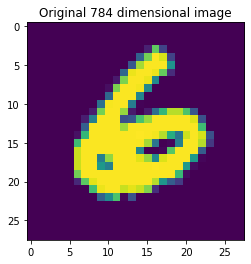

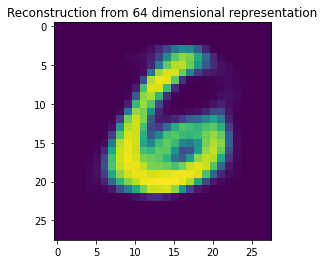

Epoch 4, Iteration 195 -- Loss: 0.026620
Epoch 4, Iteration 196 -- Loss: 0.026212
Epoch 4, Iteration 197 -- Loss: 0.027980
Epoch 4, Iteration 198 -- Loss: 0.027630
Epoch 4, Iteration 199 -- Loss: 0.028263
Epoch 4, Iteration 200 -- Loss: 0.028134
Epoch 4, Iteration 201 -- Loss: 0.026184
Epoch 4, Iteration 202 -- Loss: 0.026589
Epoch 4, Iteration 203 -- Loss: 0.026220
Epoch 4, Iteration 204 -- Loss: 0.025306


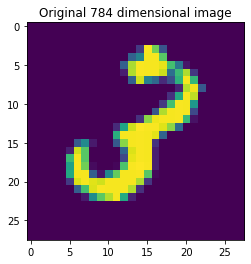

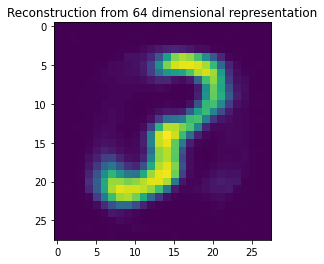

Epoch 4, Iteration 205 -- Loss: 0.025375
Epoch 4, Iteration 206 -- Loss: 0.023855
Epoch 4, Iteration 207 -- Loss: 0.023566
Epoch 4, Iteration 208 -- Loss: 0.023929
Epoch 4, Iteration 209 -- Loss: 0.028021
Epoch 4, Iteration 210 -- Loss: 0.026386
Epoch 4, Iteration 211 -- Loss: 0.024841
Epoch 4, Iteration 212 -- Loss: 0.025279
Epoch 4, Iteration 213 -- Loss: 0.024561
Epoch 4, Iteration 214 -- Loss: 0.025999


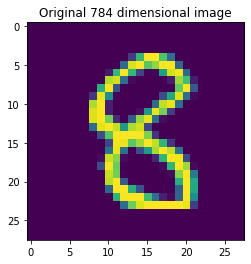

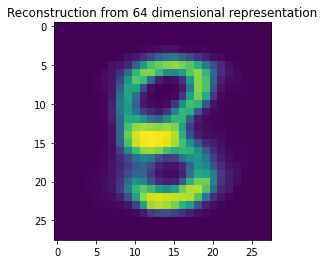

Epoch 4, Iteration 215 -- Loss: 0.024709
Epoch 4, Iteration 216 -- Loss: 0.023647
Epoch 4, Iteration 217 -- Loss: 0.024666
Epoch 4, Iteration 218 -- Loss: 0.025102
Epoch 4, Iteration 219 -- Loss: 0.024299
Epoch 4, Iteration 220 -- Loss: 0.024697
Epoch 4, Iteration 221 -- Loss: 0.024874
Epoch 4, Iteration 222 -- Loss: 0.025204
Epoch 4, Iteration 223 -- Loss: 0.023925
Epoch 4, Iteration 224 -- Loss: 0.024921


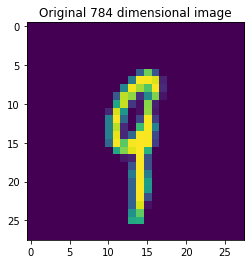

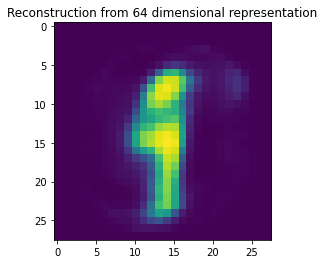

Epoch 4, Iteration 225 -- Loss: 0.023005
Epoch 4, Iteration 226 -- Loss: 0.024296
Epoch 4, Iteration 227 -- Loss: 0.024089
Epoch 4, Iteration 228 -- Loss: 0.024330
Epoch 4, Iteration 229 -- Loss: 0.023686
Epoch 4, Iteration 230 -- Loss: 0.023249
Epoch 4, Iteration 231 -- Loss: 0.022303
Epoch 5, Iteration 232 -- Loss: 0.021781


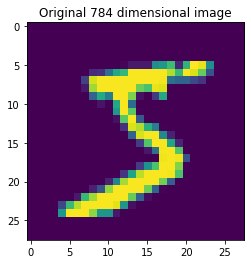

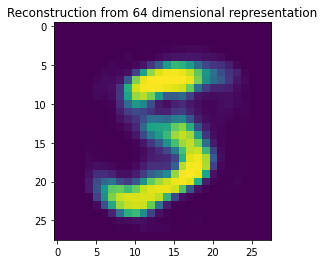

Epoch 5, Iteration 233 -- Loss: 0.024644
Epoch 5, Iteration 234 -- Loss: 0.023454
Epoch 5, Iteration 235 -- Loss: 0.022609
Epoch 5, Iteration 236 -- Loss: 0.023000
Epoch 5, Iteration 237 -- Loss: 0.023629
Epoch 5, Iteration 238 -- Loss: 0.024715
Epoch 5, Iteration 239 -- Loss: 0.024817
Epoch 5, Iteration 240 -- Loss: 0.023587
Epoch 5, Iteration 241 -- Loss: 0.024060
Epoch 5, Iteration 242 -- Loss: 0.022408


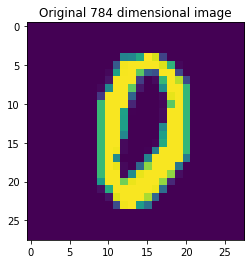

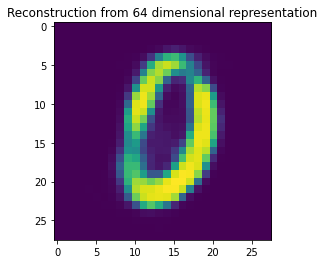

Epoch 5, Iteration 243 -- Loss: 0.021700
Epoch 5, Iteration 244 -- Loss: 0.024456
Epoch 5, Iteration 245 -- Loss: 0.024891
Epoch 5, Iteration 246 -- Loss: 0.024344
Epoch 5, Iteration 247 -- Loss: 0.022794
Epoch 5, Iteration 248 -- Loss: 0.022815
Epoch 5, Iteration 249 -- Loss: 0.022063
Epoch 5, Iteration 250 -- Loss: 0.022527
Epoch 5, Iteration 251 -- Loss: 0.022605
Epoch 5, Iteration 252 -- Loss: 0.022527


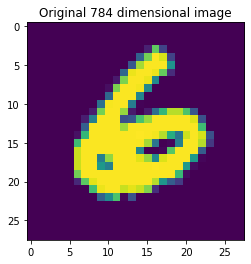

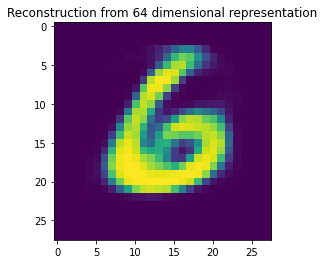

Epoch 5, Iteration 253 -- Loss: 0.023931
Epoch 5, Iteration 254 -- Loss: 0.022477
Epoch 5, Iteration 255 -- Loss: 0.023284
Epoch 5, Iteration 256 -- Loss: 0.022920
Epoch 5, Iteration 257 -- Loss: 0.023555
Epoch 5, Iteration 258 -- Loss: 0.023884
Epoch 5, Iteration 259 -- Loss: 0.023300
Epoch 5, Iteration 260 -- Loss: 0.023799
Epoch 5, Iteration 261 -- Loss: 0.023789
Epoch 5, Iteration 262 -- Loss: 0.022884


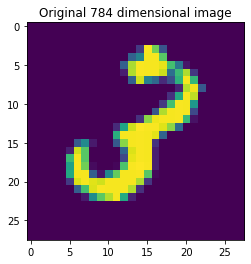

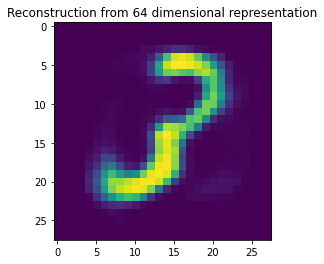

Epoch 5, Iteration 263 -- Loss: 0.022659
Epoch 5, Iteration 264 -- Loss: 0.021308
Epoch 5, Iteration 265 -- Loss: 0.020977
Epoch 5, Iteration 266 -- Loss: 0.021297
Epoch 5, Iteration 267 -- Loss: 0.025160
Epoch 5, Iteration 268 -- Loss: 0.023485
Epoch 5, Iteration 269 -- Loss: 0.022056
Epoch 5, Iteration 270 -- Loss: 0.022418
Epoch 5, Iteration 271 -- Loss: 0.021675
Epoch 5, Iteration 272 -- Loss: 0.022904


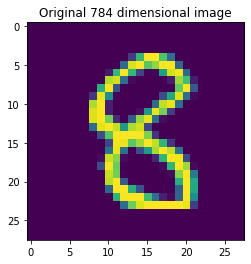

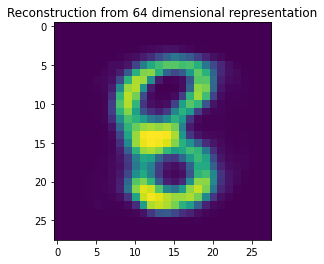

Epoch 5, Iteration 273 -- Loss: 0.021710
Epoch 5, Iteration 274 -- Loss: 0.021057
Epoch 5, Iteration 275 -- Loss: 0.022039
Epoch 5, Iteration 276 -- Loss: 0.022663
Epoch 5, Iteration 277 -- Loss: 0.022123
Epoch 5, Iteration 278 -- Loss: 0.022304
Epoch 5, Iteration 279 -- Loss: 0.022568
Epoch 5, Iteration 280 -- Loss: 0.023094
Epoch 5, Iteration 281 -- Loss: 0.022012
Epoch 5, Iteration 282 -- Loss: 0.022718


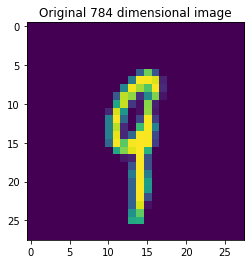

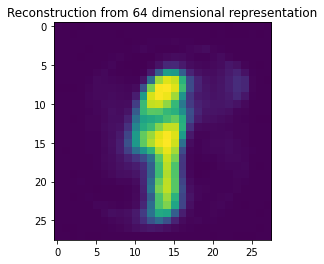

Epoch 5, Iteration 283 -- Loss: 0.020995
Epoch 5, Iteration 284 -- Loss: 0.022181
Epoch 5, Iteration 285 -- Loss: 0.022145
Epoch 5, Iteration 286 -- Loss: 0.022130
Epoch 5, Iteration 287 -- Loss: 0.021315
Epoch 5, Iteration 288 -- Loss: 0.020804
Epoch 5, Iteration 289 -- Loss: 0.020229
Epoch 6, Iteration 290 -- Loss: 0.019766


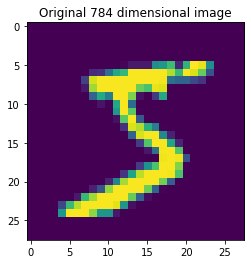

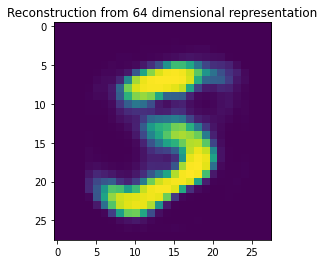

Epoch 6, Iteration 291 -- Loss: 0.022612
Epoch 6, Iteration 292 -- Loss: 0.021325
Epoch 6, Iteration 293 -- Loss: 0.020210
Epoch 6, Iteration 294 -- Loss: 0.020325
Epoch 6, Iteration 295 -- Loss: 0.020920
Epoch 6, Iteration 296 -- Loss: 0.021559
Epoch 6, Iteration 297 -- Loss: 0.021714
Epoch 6, Iteration 298 -- Loss: 0.020841
Epoch 6, Iteration 299 -- Loss: 0.021444
Epoch 6, Iteration 300 -- Loss: 0.020235


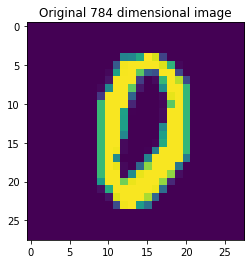

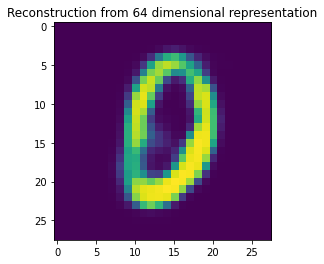

Epoch 6, Iteration 301 -- Loss: 0.019977
Epoch 6, Iteration 302 -- Loss: 0.022406
Epoch 6, Iteration 303 -- Loss: 0.022930
Epoch 6, Iteration 304 -- Loss: 0.022147
Epoch 6, Iteration 305 -- Loss: 0.020719
Epoch 6, Iteration 306 -- Loss: 0.020714
Epoch 6, Iteration 307 -- Loss: 0.020026
Epoch 6, Iteration 308 -- Loss: 0.020403
Epoch 6, Iteration 309 -- Loss: 0.020632
Epoch 6, Iteration 310 -- Loss: 0.021150


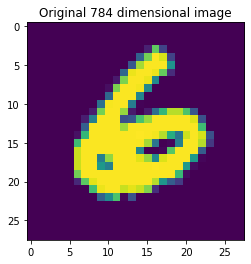

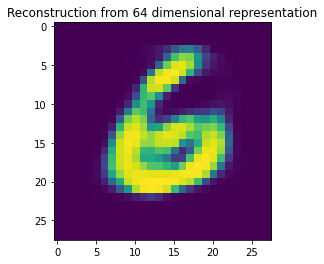

Epoch 6, Iteration 311 -- Loss: 0.022582
Epoch 6, Iteration 312 -- Loss: 0.021100
Epoch 6, Iteration 313 -- Loss: 0.021889
Epoch 6, Iteration 314 -- Loss: 0.021186
Epoch 6, Iteration 315 -- Loss: 0.021021
Epoch 6, Iteration 316 -- Loss: 0.021304
Epoch 6, Iteration 317 -- Loss: 0.020441
Epoch 6, Iteration 318 -- Loss: 0.021046
Epoch 6, Iteration 319 -- Loss: 0.020749
Epoch 6, Iteration 320 -- Loss: 0.020375


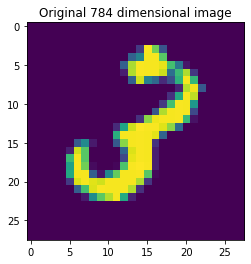

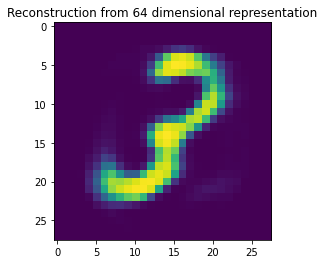

Epoch 6, Iteration 321 -- Loss: 0.020385
Epoch 6, Iteration 322 -- Loss: 0.019544
Epoch 6, Iteration 323 -- Loss: 0.019658
Epoch 6, Iteration 324 -- Loss: 0.020587
Epoch 6, Iteration 325 -- Loss: 0.025097
Epoch 6, Iteration 326 -- Loss: 0.024010
Epoch 6, Iteration 327 -- Loss: 0.021500
Epoch 6, Iteration 328 -- Loss: 0.021331
Epoch 6, Iteration 329 -- Loss: 0.020223
Epoch 6, Iteration 330 -- Loss: 0.021504


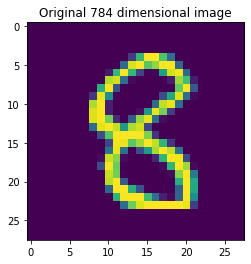

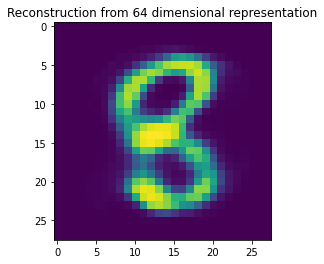

Epoch 6, Iteration 331 -- Loss: 0.020471
Epoch 6, Iteration 332 -- Loss: 0.019972
Epoch 6, Iteration 333 -- Loss: 0.020217
Epoch 6, Iteration 334 -- Loss: 0.020817
Epoch 6, Iteration 335 -- Loss: 0.020062
Epoch 6, Iteration 336 -- Loss: 0.020121
Epoch 6, Iteration 337 -- Loss: 0.019998
Epoch 6, Iteration 338 -- Loss: 0.020521
Epoch 6, Iteration 339 -- Loss: 0.019687
Epoch 6, Iteration 340 -- Loss: 0.020750


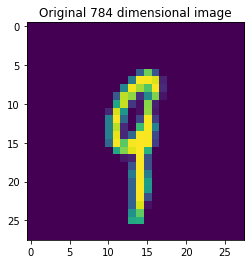

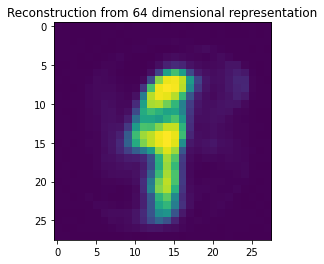

Epoch 6, Iteration 341 -- Loss: 0.019140
Epoch 6, Iteration 342 -- Loss: 0.020535
Epoch 6, Iteration 343 -- Loss: 0.020359
Epoch 6, Iteration 344 -- Loss: 0.020418
Epoch 6, Iteration 345 -- Loss: 0.019108
Epoch 6, Iteration 346 -- Loss: 0.018805
Epoch 6, Iteration 347 -- Loss: 0.018257
Epoch 7, Iteration 348 -- Loss: 0.017810


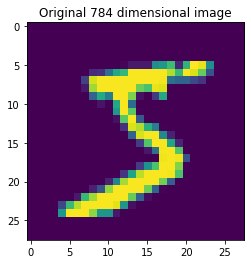

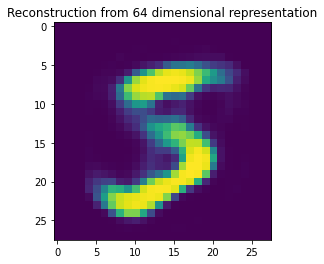

Epoch 7, Iteration 349 -- Loss: 0.020589
Epoch 7, Iteration 350 -- Loss: 0.019618
Epoch 7, Iteration 351 -- Loss: 0.018686
Epoch 7, Iteration 352 -- Loss: 0.018942
Epoch 7, Iteration 353 -- Loss: 0.019798
Epoch 7, Iteration 354 -- Loss: 0.020594
Epoch 7, Iteration 355 -- Loss: 0.020667
Epoch 7, Iteration 356 -- Loss: 0.019646
Epoch 7, Iteration 357 -- Loss: 0.020308
Epoch 7, Iteration 358 -- Loss: 0.019209


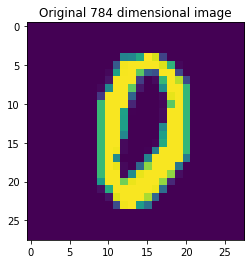

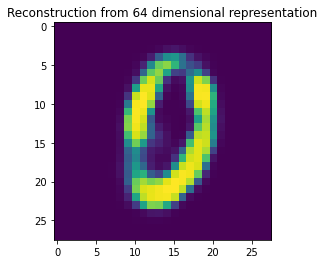

Epoch 7, Iteration 359 -- Loss: 0.019460
Epoch 7, Iteration 360 -- Loss: 0.021584
Epoch 7, Iteration 361 -- Loss: 0.022242
Epoch 7, Iteration 362 -- Loss: 0.020520
Epoch 7, Iteration 363 -- Loss: 0.018888
Epoch 7, Iteration 364 -- Loss: 0.018677
Epoch 7, Iteration 365 -- Loss: 0.018116
Epoch 7, Iteration 366 -- Loss: 0.018410
Epoch 7, Iteration 367 -- Loss: 0.018559
Epoch 7, Iteration 368 -- Loss: 0.018806


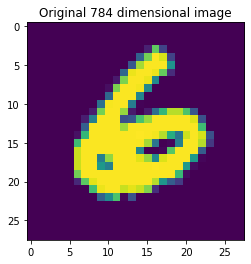

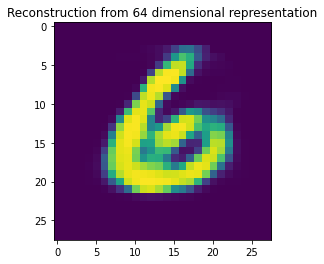

Epoch 7, Iteration 369 -- Loss: 0.020545
Epoch 7, Iteration 370 -- Loss: 0.019262
Epoch 7, Iteration 371 -- Loss: 0.020165
Epoch 7, Iteration 372 -- Loss: 0.019746
Epoch 7, Iteration 373 -- Loss: 0.019599
Epoch 7, Iteration 374 -- Loss: 0.019737
Epoch 7, Iteration 375 -- Loss: 0.018974
Epoch 7, Iteration 376 -- Loss: 0.019492
Epoch 7, Iteration 377 -- Loss: 0.019198
Epoch 7, Iteration 378 -- Loss: 0.018957


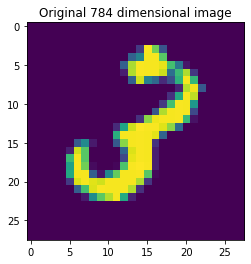

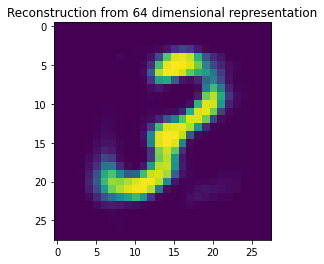

Epoch 7, Iteration 379 -- Loss: 0.018750
Epoch 7, Iteration 380 -- Loss: 0.018005
Epoch 7, Iteration 381 -- Loss: 0.017804
Epoch 7, Iteration 382 -- Loss: 0.018836
Epoch 7, Iteration 383 -- Loss: 0.023068
Epoch 7, Iteration 384 -- Loss: 0.022885
Epoch 7, Iteration 385 -- Loss: 0.020190
Epoch 7, Iteration 386 -- Loss: 0.019614
Epoch 7, Iteration 387 -- Loss: 0.018335
Epoch 7, Iteration 388 -- Loss: 0.019518


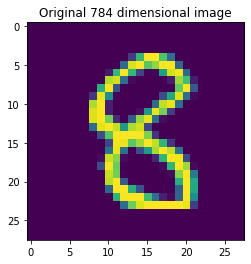

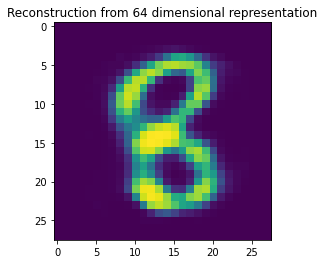

Epoch 7, Iteration 389 -- Loss: 0.018329
Epoch 7, Iteration 390 -- Loss: 0.017918
Epoch 7, Iteration 391 -- Loss: 0.018234
Epoch 7, Iteration 392 -- Loss: 0.019106
Epoch 7, Iteration 393 -- Loss: 0.018512
Epoch 7, Iteration 394 -- Loss: 0.018536
Epoch 7, Iteration 395 -- Loss: 0.018620
Epoch 7, Iteration 396 -- Loss: 0.019457
Epoch 7, Iteration 397 -- Loss: 0.018684
Epoch 7, Iteration 398 -- Loss: 0.019674


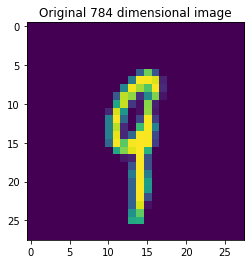

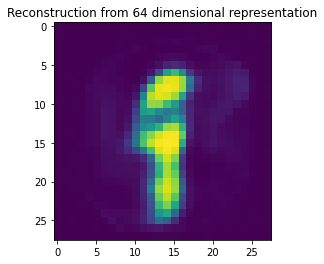

Epoch 7, Iteration 399 -- Loss: 0.017886
Epoch 7, Iteration 400 -- Loss: 0.019369
Epoch 7, Iteration 401 -- Loss: 0.019319
Epoch 7, Iteration 402 -- Loss: 0.019318
Epoch 7, Iteration 403 -- Loss: 0.017937
Epoch 7, Iteration 404 -- Loss: 0.017613
Epoch 7, Iteration 405 -- Loss: 0.017088
Epoch 8, Iteration 406 -- Loss: 0.016563


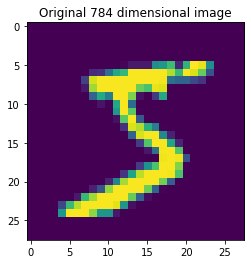

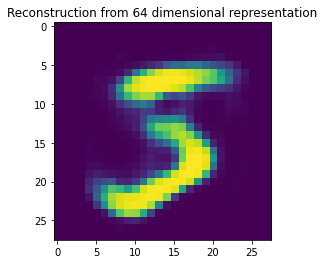

Epoch 8, Iteration 407 -- Loss: 0.019172
Epoch 8, Iteration 408 -- Loss: 0.018390
Epoch 8, Iteration 409 -- Loss: 0.017301
Epoch 8, Iteration 410 -- Loss: 0.017368
Epoch 8, Iteration 411 -- Loss: 0.018269
Epoch 8, Iteration 412 -- Loss: 0.019505
Epoch 8, Iteration 413 -- Loss: 0.019383
Epoch 8, Iteration 414 -- Loss: 0.018052
Epoch 8, Iteration 415 -- Loss: 0.018676
Epoch 8, Iteration 416 -- Loss: 0.017628


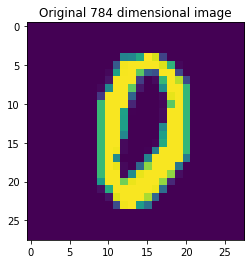

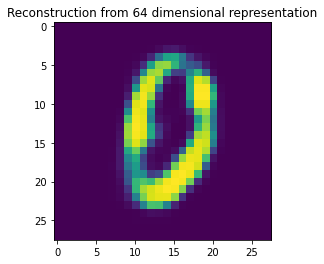

Epoch 8, Iteration 417 -- Loss: 0.017837
Epoch 8, Iteration 418 -- Loss: 0.019579
Epoch 8, Iteration 419 -- Loss: 0.020263
Epoch 8, Iteration 420 -- Loss: 0.019275
Epoch 8, Iteration 421 -- Loss: 0.017869
Epoch 8, Iteration 422 -- Loss: 0.017686
Epoch 8, Iteration 423 -- Loss: 0.017151
Epoch 8, Iteration 424 -- Loss: 0.017355
Epoch 8, Iteration 425 -- Loss: 0.017484
Epoch 8, Iteration 426 -- Loss: 0.017714


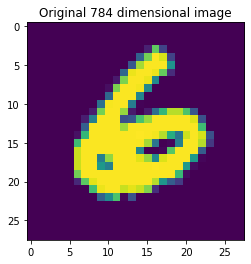

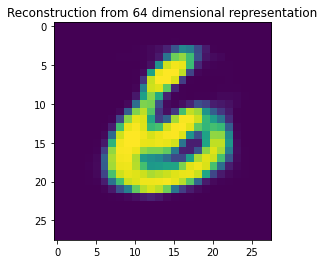

Epoch 8, Iteration 427 -- Loss: 0.019423
Epoch 8, Iteration 428 -- Loss: 0.018286
Epoch 8, Iteration 429 -- Loss: 0.019320
Epoch 8, Iteration 430 -- Loss: 0.019094
Epoch 8, Iteration 431 -- Loss: 0.019530
Epoch 8, Iteration 432 -- Loss: 0.019419
Epoch 8, Iteration 433 -- Loss: 0.018464
Epoch 8, Iteration 434 -- Loss: 0.018514
Epoch 8, Iteration 435 -- Loss: 0.018666
Epoch 8, Iteration 436 -- Loss: 0.017920


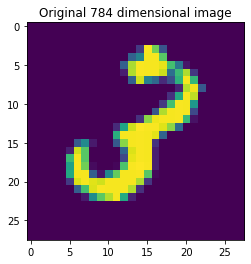

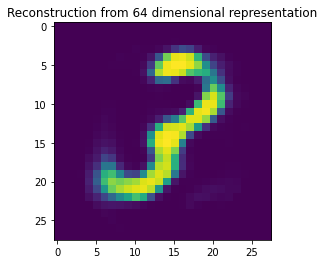

Epoch 8, Iteration 437 -- Loss: 0.017237
Epoch 8, Iteration 438 -- Loss: 0.016368
Epoch 8, Iteration 439 -- Loss: 0.016141
Epoch 8, Iteration 440 -- Loss: 0.016719
Epoch 8, Iteration 441 -- Loss: 0.020735
Epoch 8, Iteration 442 -- Loss: 0.020061
Epoch 8, Iteration 443 -- Loss: 0.018224
Epoch 8, Iteration 444 -- Loss: 0.017976
Epoch 8, Iteration 445 -- Loss: 0.016738
Epoch 8, Iteration 446 -- Loss: 0.018127


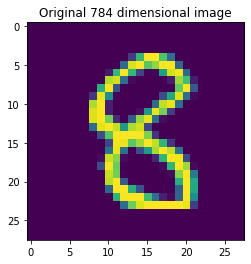

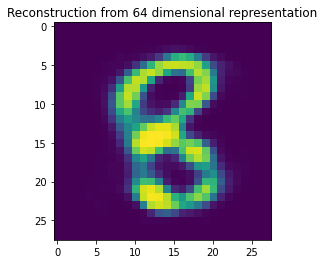

Epoch 8, Iteration 447 -- Loss: 0.017527
Epoch 8, Iteration 448 -- Loss: 0.017651
Epoch 8, Iteration 449 -- Loss: 0.017593
Epoch 8, Iteration 450 -- Loss: 0.018482
Epoch 8, Iteration 451 -- Loss: 0.017974
Epoch 8, Iteration 452 -- Loss: 0.017969
Epoch 8, Iteration 453 -- Loss: 0.017866
Epoch 8, Iteration 454 -- Loss: 0.019097
Epoch 8, Iteration 455 -- Loss: 0.018235
Epoch 8, Iteration 456 -- Loss: 0.019053


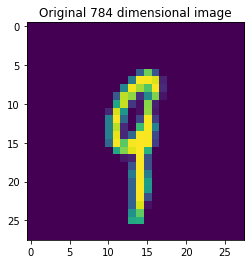

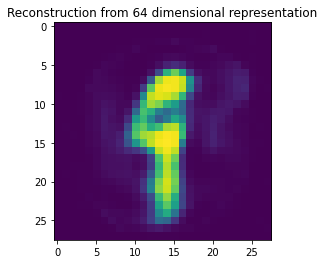

Epoch 8, Iteration 457 -- Loss: 0.017178
Epoch 8, Iteration 458 -- Loss: 0.018303
Epoch 8, Iteration 459 -- Loss: 0.018041
Epoch 8, Iteration 460 -- Loss: 0.017784
Epoch 8, Iteration 461 -- Loss: 0.016709
Epoch 8, Iteration 462 -- Loss: 0.016395
Epoch 8, Iteration 463 -- Loss: 0.015799
Epoch 9, Iteration 464 -- Loss: 0.015221


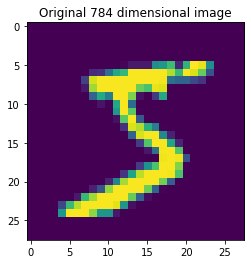

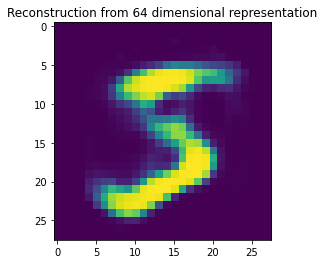

Epoch 9, Iteration 465 -- Loss: 0.017605
Epoch 9, Iteration 466 -- Loss: 0.016636
Epoch 9, Iteration 467 -- Loss: 0.015964
Epoch 9, Iteration 468 -- Loss: 0.016171
Epoch 9, Iteration 469 -- Loss: 0.017030
Epoch 9, Iteration 470 -- Loss: 0.017960
Epoch 9, Iteration 471 -- Loss: 0.018228
Epoch 9, Iteration 472 -- Loss: 0.016997
Epoch 9, Iteration 473 -- Loss: 0.017937
Epoch 9, Iteration 474 -- Loss: 0.016801


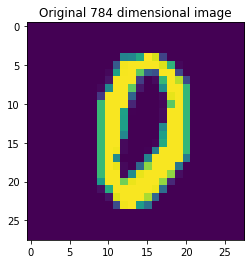

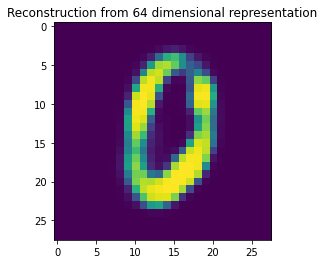

Epoch 9, Iteration 475 -- Loss: 0.017680
Epoch 9, Iteration 476 -- Loss: 0.019089
Epoch 9, Iteration 477 -- Loss: 0.020227
Epoch 9, Iteration 478 -- Loss: 0.018631
Epoch 9, Iteration 479 -- Loss: 0.016838
Epoch 9, Iteration 480 -- Loss: 0.016521
Epoch 9, Iteration 481 -- Loss: 0.016101
Epoch 9, Iteration 482 -- Loss: 0.016134
Epoch 9, Iteration 483 -- Loss: 0.016198
Epoch 9, Iteration 484 -- Loss: 0.016301


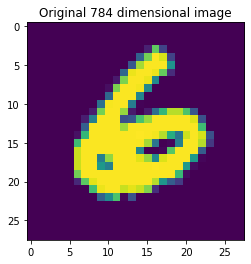

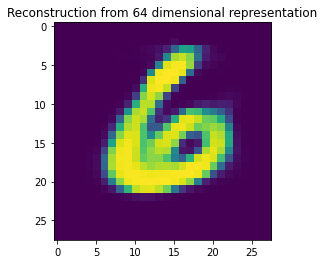

Epoch 9, Iteration 485 -- Loss: 0.017877
Epoch 9, Iteration 486 -- Loss: 0.016595
Epoch 9, Iteration 487 -- Loss: 0.017260
Epoch 9, Iteration 488 -- Loss: 0.016910
Epoch 9, Iteration 489 -- Loss: 0.017539
Epoch 9, Iteration 490 -- Loss: 0.018010
Epoch 9, Iteration 491 -- Loss: 0.017733
Epoch 9, Iteration 492 -- Loss: 0.017980
Epoch 9, Iteration 493 -- Loss: 0.018582
Epoch 9, Iteration 494 -- Loss: 0.017573


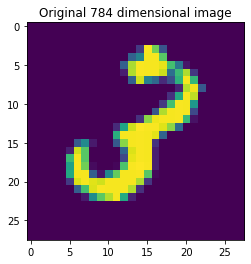

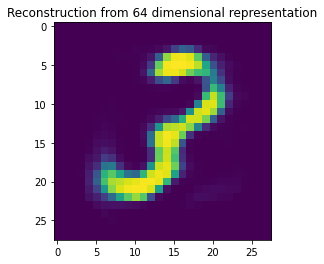

Epoch 9, Iteration 495 -- Loss: 0.016606
Epoch 9, Iteration 496 -- Loss: 0.015886
Epoch 9, Iteration 497 -- Loss: 0.015772
Epoch 9, Iteration 498 -- Loss: 0.016488
Epoch 9, Iteration 499 -- Loss: 0.020542
Epoch 9, Iteration 500 -- Loss: 0.019778
Epoch 9, Iteration 501 -- Loss: 0.018311
Epoch 9, Iteration 502 -- Loss: 0.017788
Epoch 9, Iteration 503 -- Loss: 0.016707
Epoch 9, Iteration 504 -- Loss: 0.017895


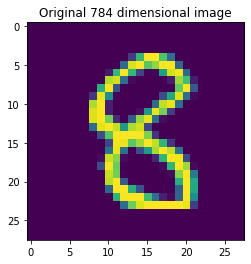

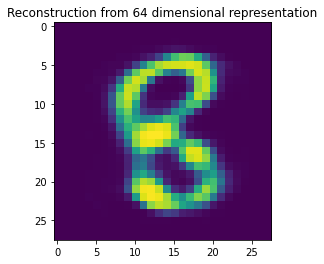

Epoch 9, Iteration 505 -- Loss: 0.017153
Epoch 9, Iteration 506 -- Loss: 0.017095
Epoch 9, Iteration 507 -- Loss: 0.016822
Epoch 9, Iteration 508 -- Loss: 0.017509
Epoch 9, Iteration 509 -- Loss: 0.016726
Epoch 9, Iteration 510 -- Loss: 0.016691
Epoch 9, Iteration 511 -- Loss: 0.016608
Epoch 9, Iteration 512 -- Loss: 0.017466
Epoch 9, Iteration 513 -- Loss: 0.016803
Epoch 9, Iteration 514 -- Loss: 0.018073


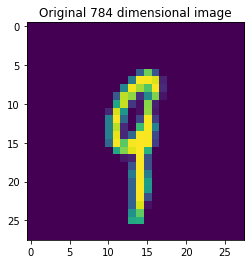

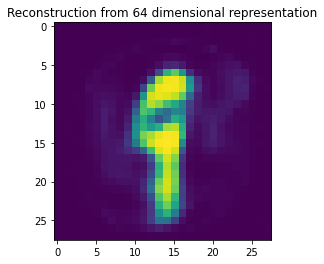

Epoch 9, Iteration 515 -- Loss: 0.016601
Epoch 9, Iteration 516 -- Loss: 0.018091
Epoch 9, Iteration 517 -- Loss: 0.017963
Epoch 9, Iteration 518 -- Loss: 0.017985
Epoch 9, Iteration 519 -- Loss: 0.016360
Epoch 9, Iteration 520 -- Loss: 0.015969
Epoch 9, Iteration 521 -- Loss: 0.015253
Epoch 10, Iteration 522 -- Loss: 0.014568


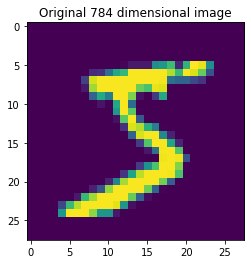

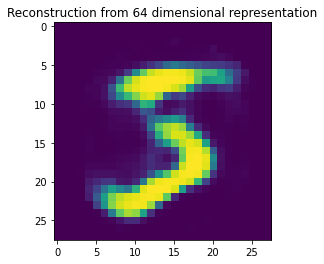

Epoch 10, Iteration 523 -- Loss: 0.016897
Epoch 10, Iteration 524 -- Loss: 0.016032
Epoch 10, Iteration 525 -- Loss: 0.015135
Epoch 10, Iteration 526 -- Loss: 0.015274
Epoch 10, Iteration 527 -- Loss: 0.015749
Epoch 10, Iteration 528 -- Loss: 0.016336
Epoch 10, Iteration 529 -- Loss: 0.016570
Epoch 10, Iteration 530 -- Loss: 0.015725
Epoch 10, Iteration 531 -- Loss: 0.016322
Epoch 10, Iteration 532 -- Loss: 0.015668


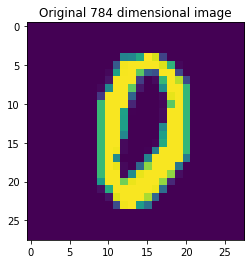

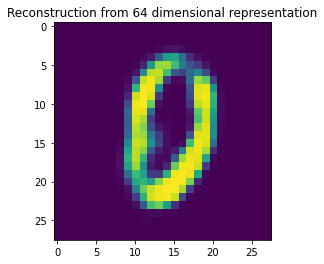

Epoch 10, Iteration 533 -- Loss: 0.016307
Epoch 10, Iteration 534 -- Loss: 0.017861
Epoch 10, Iteration 535 -- Loss: 0.019255
Epoch 10, Iteration 536 -- Loss: 0.017826
Epoch 10, Iteration 537 -- Loss: 0.015992
Epoch 10, Iteration 538 -- Loss: 0.015534
Epoch 10, Iteration 539 -- Loss: 0.015100
Epoch 10, Iteration 540 -- Loss: 0.015289
Epoch 10, Iteration 541 -- Loss: 0.015183
Epoch 10, Iteration 542 -- Loss: 0.015170


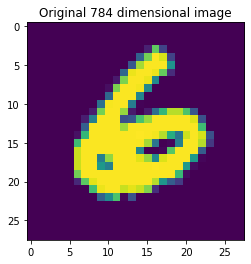

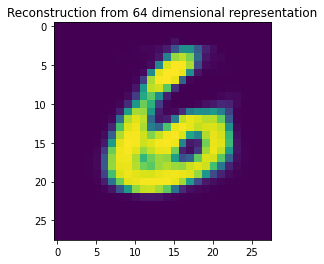

Epoch 10, Iteration 543 -- Loss: 0.016597
Epoch 10, Iteration 544 -- Loss: 0.015653
Epoch 10, Iteration 545 -- Loss: 0.016752
Epoch 10, Iteration 546 -- Loss: 0.016490
Epoch 10, Iteration 547 -- Loss: 0.017559
Epoch 10, Iteration 548 -- Loss: 0.017571
Epoch 10, Iteration 549 -- Loss: 0.016742
Epoch 10, Iteration 550 -- Loss: 0.016599
Epoch 10, Iteration 551 -- Loss: 0.017071
Epoch 10, Iteration 552 -- Loss: 0.016226


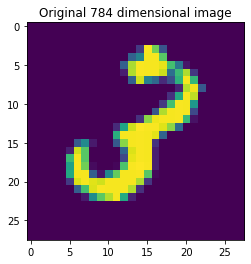

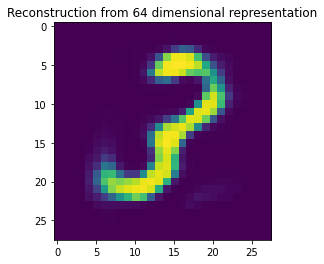

Epoch 10, Iteration 553 -- Loss: 0.015319
Epoch 10, Iteration 554 -- Loss: 0.014544
Epoch 10, Iteration 555 -- Loss: 0.014363
Epoch 10, Iteration 556 -- Loss: 0.014818
Epoch 10, Iteration 557 -- Loss: 0.018588
Epoch 10, Iteration 558 -- Loss: 0.018371
Epoch 10, Iteration 559 -- Loss: 0.017138
Epoch 10, Iteration 560 -- Loss: 0.016845
Epoch 10, Iteration 561 -- Loss: 0.015755
Epoch 10, Iteration 562 -- Loss: 0.017000


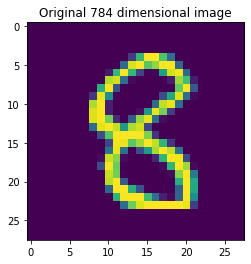

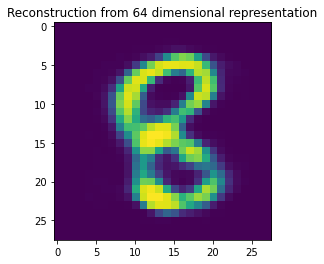

Epoch 10, Iteration 563 -- Loss: 0.016634
Epoch 10, Iteration 564 -- Loss: 0.017063
Epoch 10, Iteration 565 -- Loss: 0.016280
Epoch 10, Iteration 566 -- Loss: 0.017047
Epoch 10, Iteration 567 -- Loss: 0.016256
Epoch 10, Iteration 568 -- Loss: 0.016292
Epoch 10, Iteration 569 -- Loss: 0.016347
Epoch 10, Iteration 570 -- Loss: 0.017201
Epoch 10, Iteration 571 -- Loss: 0.016258
Epoch 10, Iteration 572 -- Loss: 0.017085


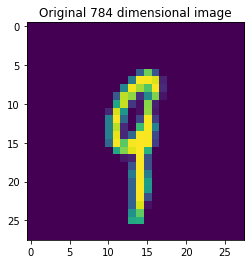

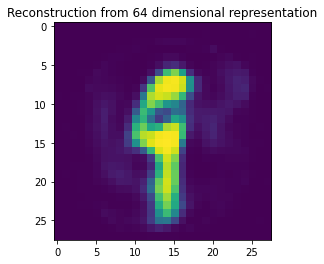

Epoch 10, Iteration 573 -- Loss: 0.015254
Epoch 10, Iteration 574 -- Loss: 0.016433
Epoch 10, Iteration 575 -- Loss: 0.016345
Epoch 10, Iteration 576 -- Loss: 0.016457
Epoch 10, Iteration 577 -- Loss: 0.015301
Epoch 10, Iteration 578 -- Loss: 0.015154
Epoch 10, Iteration 579 -- Loss: 0.014627


In [13]:
# If you are confused what h1, o1, D_w1, etc. means, 
#   refer to the notes at the top of the notebook.
# Otherwise, feel free to delete this comment.


for epoch in range(NUM_EPOCHS): 
    for n in range(ITERATIONS_PER_EPOCH):
        
        ## Sample batch from dataset
        batch_indices = range(n*BATCH_SIZE, n*BATCH_SIZE + BATCH_SIZE)
        X_batch = X[batch_indices]
        
        ## Forward propagation
        h1 = X_batch @ w1
        o1 = relu(h1)
        
        h2 = o1 @ w2
        o2 = sigmoid(h2)      
      
        
        loss = mean_squared_error(o2, X_batch)
        
        print('Epoch %d, Iteration %d -- Loss: %.6f' % (epoch + 1, epoch * ITERATIONS_PER_EPOCH + n, loss))
            
        ## Backpropagation
        
        D_o2 = 2 * (o2 - X_batch) # Derivation of the MSE function
        
        D_h2 = sigmoid_backward(D_o2, o2)
        
        D_o1 = D_h2 @ w2.T
        D_w2 = o1.T @ D_h2
        
        D_h1 = relu_backward(D_o1, o1)
        
        D_o1 = D_h1 @ w1.T
        D_w1 = X_batch.T @ D_h1
        
        ## Parameter updates
        w1 -= D_w1 * LEARNING_RATE
        w2 -= D_w2 * LEARNING_RATE
        
        
        if n % 10 == 0:
            plt.figure()
            plt.title('Original %d dimensional image' % INPUT_SIZE)
            plt.imshow(X_batch[0].reshape(28, 28)); plt.show()
            
            
            plt.figure()
            plt.title('Reconstruction from %d dimensional representation' % HIDDEN_SIZE)
            plt.imshow(o2[0].reshape(28, 28)); plt.show()
        
    
    
